# Assignment 5: Exploratory Data Analysis and Hypothesis Testing

**Student:** Decheng Zheng  
**Dataset:** Air Quality  
**Date:** 10/7/25

## Objective
Perform exploratory data analysis (EDA) and hypothesis testing on your chosen dataset. Identify patterns and test meaningful hypotheses about relationships between variables.

---


## 1. Import Data and Libraries

Import the necessary libraries and load your dataset.


In [5]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Set up plotting
plt.style.use('default')
sns.set_palette("husl")

print("Libraries imported successfully!")


Libraries imported successfully!


In [6]:
# Load Air Quality dataset
df = pd.read_csv(
    '/AirQualityUCI.csv',
    sep=';',
    decimal=',',
    header=0,
    na_values=-200
)

# Drop the last empty column if exists
if '' in df.columns:
    df = df.drop(columns=[''])

print(f"Dataset shape: {df.shape}")
df.head()


Dataset shape: (9471, 17)


,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,10/03/2004,18.00.00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,NaN,NaN
1,10/03/2004,19.00.00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,NaN,NaN
2,10/03/2004,20.00.00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,NaN,NaN
3,10/03/2004,21.00.00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,NaN,NaN
4,10/03/2004,22.00.00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,NaN,NaN


## 2. Exploratory Data Analysis (EDA)

Explore your dataset to understand its structure and identify patterns.


In [7]:
# Basic dataset information
print("=== DATASET OVERVIEW ===")
print(f"Shape: {df.shape}")
print(f"\nData types:")
print(df.dtypes)
print(f"\nMissing values:")
print(df.isnull().sum())
print(f"\nBasic statistics:")
df.describe()


=== DATASET OVERVIEW ===
Shape: (9471, 17)

Data types:
Date              object
Time              object
CO(GT)           float64
PT08.S1(CO)      float64
NMHC(GT)         float64
C6H6(GT)         float64
PT08.S2(NMHC)    float64
NOx(GT)          float64
PT08.S3(NOx)     float64
NO2(GT)          float64
PT08.S4(NO2)     float64
PT08.S5(O3)      float64
T                float64
RH               float64
AH               float64
Unnamed: 15      float64
Unnamed: 16      float64
dtype: object

Missing values:
Date              114
Time              114
CO(GT)           1797
PT08.S1(CO)       480
NMHC(GT)         8557
C6H6(GT)          480
PT08.S2(NMHC)     480
NOx(GT)          1753
PT08.S3(NOx)      480
NO2(GT)          1756
PT08.S4(NO2)      480
PT08.S5(O3)       480
T                 480
RH                480
AH                480
Unnamed: 15      9471
Unnamed: 16      9471
dtype: int64

Basic statistics:


,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
count,7674.000000,8991.000000,914.000000,8991.000000,8991.000000,7718.000000,8991.000000,7715.000000,8991.000000,8991.000000,8991.000000,8991.000000,8991.000000,0.0,0.0
mean,2.152750,1099.833166,218.811816,10.083105,939.153376,246.896735,835.493605,113.091251,1456.264598,1022.906128,18.317829,49.234201,1.025530,NaN,NaN
std,1.453252,217.080037,204.459921,7.449820,266.831429,212.979168,256.817320,48.370108,346.206794,398.484288,8.832116,17.316892,0.403813,NaN,NaN
min,0.100000,647.000000,7.000000,0.100000,383.000000,2.000000,322.000000,2.000000,551.000000,221.000000,-1.900000,9.200000,0.184700,NaN,NaN
25%,1.100000,937.000000,67.000000,4.400000,734.500000,98.000000,658.000000,78.000000,1227.000000,731.500000,11.800000,35.800000,0.736800,NaN,NaN
50%,1.800000,1063.000000,150.000000,8.200000,909.000000,180.000000,806.000000,109.000000,1463.000000,963.000000,17.800000,49.600000,0.995400,NaN,NaN
75%,2.900000,1231.000000,297.000000,14.000000,1116.000000,326.000000,969.500000,142.000000,1674.000000,1273.500000,24.400000,62.500000,1.313700,NaN,NaN
max,11.900000,2040.000000,1189.000000,63.700000,2214.000000,1479.000000,2683.000000,340.000000,2775.000000,2523.000000,44.600000,88.700000,2.231000,NaN,NaN


=== CO(GT) VARIABLE ===
CO(GT) value counts:
CO(GT)
NaN    1797
1.0     305
1.4     279
1.6     275
1.5     273
1.1     262
0.7     260
1.7     258
1.3     253
0.8     251
Name: count, dtype: int64


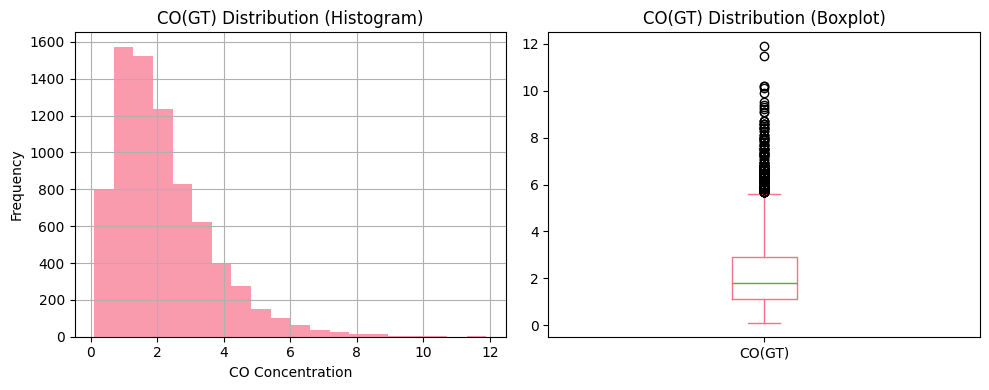

In [9]:
# Pollutant analysis example: CO(GT)
print("=== CO(GT) VARIABLE ===")
co_counts = df['CO(GT)'].value_counts(dropna=False)
print("CO(GT) value counts:")
print(co_counts.head(10))

# Visualize CO(GT) distribution
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
df['CO(GT)'].hist(bins=20, alpha=0.7)
plt.title('CO(GT) Distribution (Histogram)')
plt.xlabel('CO Concentration')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
df['CO(GT)'].dropna().plot(kind='box')
plt.title('CO(GT) Distribution (Boxplot)')

plt.tight_layout()
plt.show()



=== NUMERICAL VARIABLES ===
Numerical columns: ['CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)', 'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)', 'T', 'RH', 'AH', 'Unnamed: 15', 'Unnamed: 16']


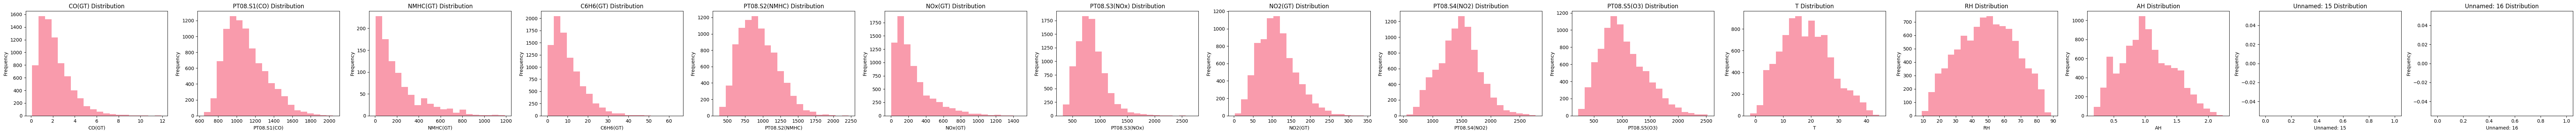

In [10]:
# Numerical variables analysis
print("=== NUMERICAL VARIABLES ===")
numerical_cols = df.select_dtypes(include=[np.number]).columns
print(f"Numerical columns: {list(numerical_cols)}")

# Create histograms for numerical variables
fig, axes = plt.subplots(1, len(numerical_cols), figsize=(5*len(numerical_cols), 4))
if len(numerical_cols) == 1:
    axes = [axes]

for i, col in enumerate(numerical_cols):
    axes[i].hist(df[col].dropna(), bins=20, alpha=0.7)
    axes[i].set_title(f'{col} Distribution')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()



=== CATEGORICAL VARIABLES ===
Categorical columns: ['Hour', 'Weekday']

Hour value counts:
Hour
0.0     390
1.0     390
2.0     390
3.0     390
4.0     390
5.0     390
6.0     390
7.0     390
8.0     390
9.0     390
10.0    390
11.0    390
12.0    390
13.0    390
14.0    390
15.0    389
16.0    389
17.0    389
18.0    390
19.0    390
20.0    390
21.0    390
22.0    390
23.0    390
Name: count, dtype: int64


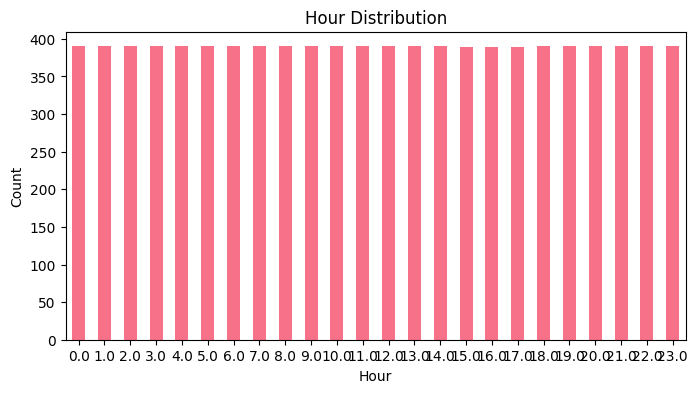


Weekday value counts:
Weekday
0.0    1335
1.0    1320
2.0    1326
3.0    1344
4.0    1344
5.0    1344
6.0    1344
Name: count, dtype: int64


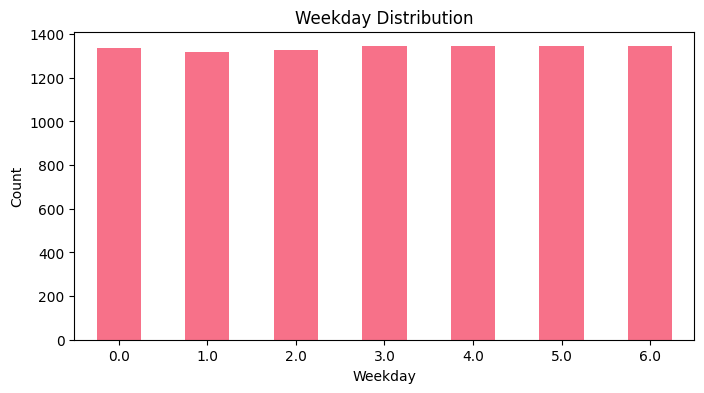

In [14]:
date_time = pd.to_datetime(
    df['Date'] + ' ' + df['Time'],
    format='%d/%m/%Y %H.%M.%S',
    errors='coerce'
)

# Extract Hour and Weekday into new columns
df['Hour'] = date_time.dt.hour
df['Weekday'] = date_time.dt.weekday

categorical_cols = ['Hour', 'Weekday']
print("=== CATEGORICAL VARIABLES ===")
print(f"Categorical columns: {categorical_cols}")

for col in categorical_cols:
    print(f"\n{col} value counts:")
    print(df[col].value_counts().sort_index())

    # Bar plot
    import matplotlib.pyplot as plt
    plt.figure(figsize=(8,4))
    df[col].value_counts().sort_index().plot(kind='bar')
    plt.title(f'{col} Distribution')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=0)
    plt.show()

=== CORRELATION ANALYSIS ===


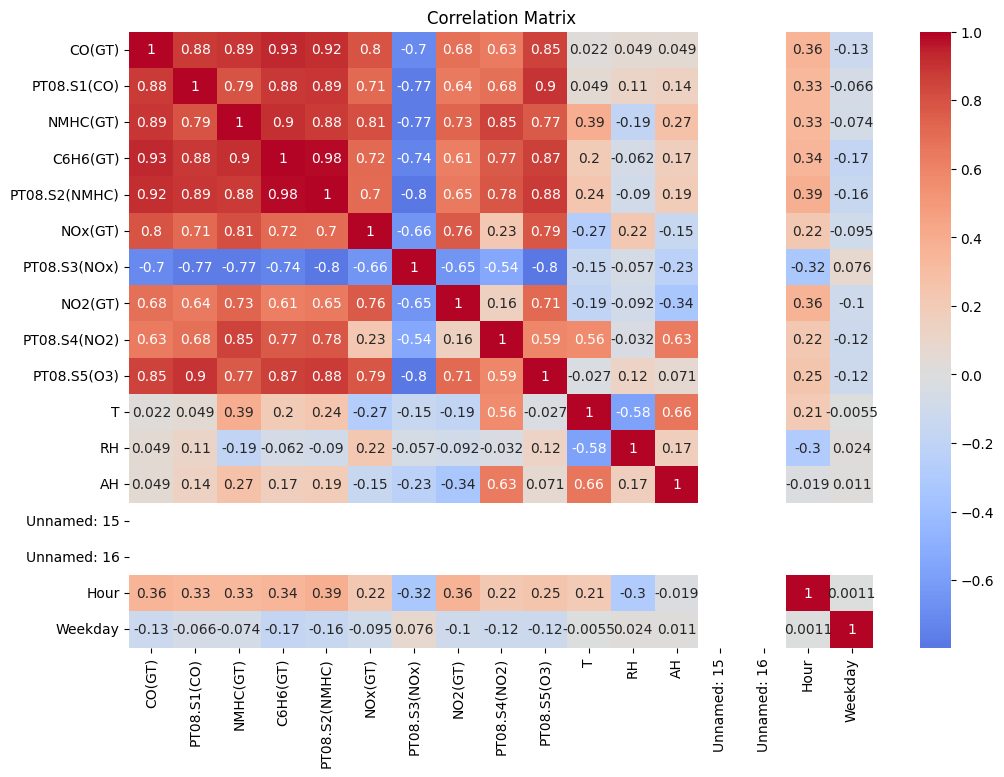


Correlations with CO(GT):
CO(GT)           1.000000
C6H6(GT)         0.931078
PT08.S2(NMHC)    0.915514
NMHC(GT)         0.889734
PT08.S1(CO)      0.879288
PT08.S5(O3)      0.854182
NOx(GT)          0.795028
NO2(GT)          0.683343
PT08.S4(NO2)     0.630703
Hour             0.358159
RH               0.048890
AH               0.048556
T                0.022109
Weekday         -0.126886
PT08.S3(NOx)    -0.703446
Unnamed: 15           NaN
Unnamed: 16           NaN
Name: CO(GT), dtype: float64


In [16]:
# Correlation analysis
print("=== CORRELATION ANALYSIS ===")

# Select only numeric columns to avoid conversion errors
numeric_df = df.select_dtypes(include=[np.number])
correlation_matrix = numeric_df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()

# Show correlations with a variable of interest
if 'CO(GT)' in numeric_df.columns:
    co_correlations = correlation_matrix['CO(GT)'].sort_values(ascending=False)
    print("\nCorrelations with CO(GT):")
    print(co_correlations)

=== RELATIONSHIPS WITH CO(GT) ===


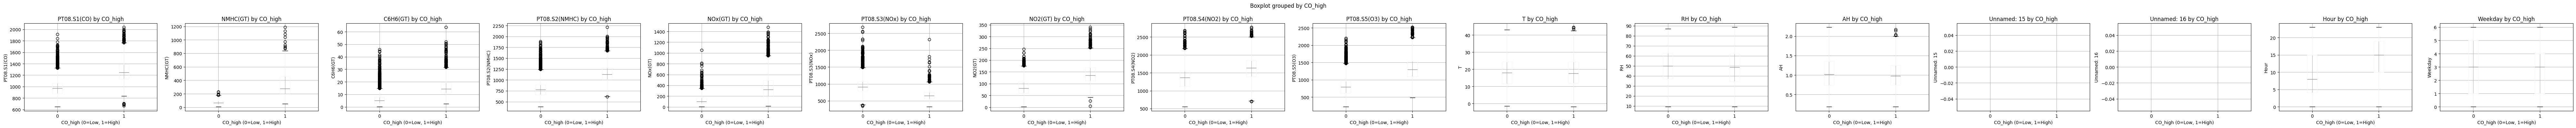


Hour vs CO_high:
CO_high      0      1
Hour                 
0.0      0.672  0.328
1.0      0.805  0.195
2.0      0.900  0.100
3.0      0.946  0.054
4.0      0.974  0.026
5.0      0.982  0.018
6.0      0.979  0.021
7.0      0.692  0.308
8.0      0.426  0.574
9.0      0.385  0.615
10.0     0.438  0.562
11.0     0.528  0.472
12.0     0.518  0.482
13.0     0.505  0.495
14.0     0.541  0.459
15.0     0.550  0.450
16.0     0.501  0.499
17.0     0.393  0.607
18.0     0.318  0.682
19.0     0.285  0.715
20.0     0.315  0.685
21.0     0.436  0.564
22.0     0.577  0.423
23.0     0.633  0.367

Weekday vs CO_high:
CO_high      0      1
Weekday              
0.0      0.628  0.372
1.0      0.558  0.442
2.0      0.546  0.454
3.0      0.530  0.470
4.0      0.476  0.524
5.0      0.630  0.370
6.0      0.801  0.199


In [17]:
# Relationship between variables and a variable of interest
print("=== RELATIONSHIPS WITH CO(GT) ===")

# Create a binary "target" based on median CO
df['CO_high'] = (df['CO(GT)'] > df['CO(GT)'].median()).astype(int)

# Box plots for numerical variables vs CO_high
numerical_cols_no_target = [col for col in numeric_df.columns if col != 'CO(GT)']

if len(numerical_cols_no_target) > 0:
    fig, axes = plt.subplots(1, len(numerical_cols_no_target), figsize=(5*len(numerical_cols_no_target), 4))
    if len(numerical_cols_no_target) == 1:
        axes = [axes]

    for i, col in enumerate(numerical_cols_no_target):
        df.boxplot(column=col, by='CO_high', ax=axes[i])
        axes[i].set_title(f'{col} by CO_high')
        axes[i].set_xlabel('CO_high (0=Low, 1=High)')
        axes[i].set_ylabel(col)

    plt.tight_layout()
    plt.show()

# Crosstabs for categorical variables vs CO_high
for col in categorical_cols:
    print(f"\n{col} vs CO_high:")
    crosstab = pd.crosstab(df[col], df['CO_high'], normalize='index')
    print(crosstab.round(3))



## 3. Hypothesis Formulation

Based on your EDA, formulate **2-3 testable hypotheses**. Each hypothesis should be:
- Clear and specific
- Testable with statistical methods
- Grounded in your observations

### Hypothesis 1: CO levels are higher during rush hours
- **Null Hypothesis (H0):** CO levels are the same regardless of the hour of the day.  
- **Alternative Hypothesis (H1):** CO levels are higher during morning and evening rush hours (around 7–9 AM and 5–7 PM).  
- **Rationale:** Cars are a major source of CO. During rush hours, traffic increases, so we expect CO concentrations to be higher at those times.


### Hypothesis 2: Higher temperature is associated with lower relative humidity
- **Null Hypothesis (H0):** Temperature and relative humidity are not related.  
- **Alternative Hypothesis (H1):** As temperature increases, relative humidity decreases.  
- **Rationale:** Warm air holds more moisture, so for the same amount of water in the air, the relative humidity drops as temperature rises.


### Hypothesis 3: [Your third hypothesis - optional]
**H3:** [State your hypothesis]
- **Null Hypothesis (H0):** [State null hypothesis]
- **Alternative Hypothesis (H1):** [State alternative hypothesis]
- **Rationale:** [Explain why you think this relationship exists]

---


## 4. Hypothesis Testing

Test each hypothesis using appropriate statistical methods. For each test, explain:
- Why you chose this test
- The results and interpretation
- Whether you reject or fail to reject the null hypothesis


### Testing Hypothesis 1: CO levels are higher during rush hours

**Test Choice:** Independent t-test
- **Why appropriate:** We are comparing the average CO levels between two independent groups (rush hours vs non-rush hours). The t-test checks if their means are significantly different.



In [18]:
print("=== TESTING HYPOTHESIS 1 ===")

import numpy as np
from scipy.stats import ttest_ind

# Define rush hours and nonrush hours
rush_hours = df[df['Hour'].isin([7, 8, 9, 17, 18, 19])]['CO(GT)'].dropna()
non_rush_hours = df[~df['Hour'].isin([7, 8, 9, 17, 18, 19])]['CO(GT)'].dropna()

# Perform independent t-test
t_stat, p_value = ttest_ind(rush_hours, non_rush_hours, equal_var=False)

print(f"T-statistic: {t_stat:.3f}")
print(f"P-value: {p_value:.3f}")

# Interpretation
alpha = 0.05
if p_value < alpha:
    print("Reject H0: CO levels are significantly higher during rush hours.")
else:
    print("Fail to reject H0: No significant difference in CO levels between rush and non-rush hours.")


=== TESTING HYPOTHESIS 1 ===
T-statistic: 25.211
P-value: 0.000
Reject H0: CO levels are significantly higher during rush hours.


### Testing Hypothesis 2: Higher temperature is associated with lower relative humidity

**Test Choice:** Pearson correlation
- **Why appropriate:** Both temperature (T) and relative humidity (RH) are numeric and continuous. Pearson correlation measures the strength and direction of the linear relationship between two numeric variables.


In [19]:
# Hypothesis 2 Testing
print("=== TESTING HYPOTHESIS 2 ===")

from scipy.stats import pearsonr

# Drop missing values
temp = df['T'].dropna()
humidity = df['RH'].dropna()

# Align the two series
common_index = temp.index.intersection(humidity.index)
temp = temp.loc[common_index]
humidity = humidity.loc[common_index]

# Perform Pearson correlation
corr_coef, p_value = pearsonr(temp, humidity)

print(f"Pearson correlation coefficient: {corr_coef:.3f}")
print(f"P-value: {p_value:.3f}")

# Interpretation
alpha = 0.05
if p_value < alpha:
    print("Reject H0: Temperature and relative humidity are significantly correlated.")
    if corr_coef < 0:
        print("Interpretation: As temperature increases, relative humidity decreases (negative correlation).")
    else:
        print("Interpretation: Temperature and relative humidity increase together (positive correlation).")
else:
    print("Fail to reject H0: No significant correlation between temperature and relative humidity.")



=== TESTING HYPOTHESIS 2 ===
Pearson correlation coefficient: -0.579
P-value: 0.000
Reject H0: Temperature and relative humidity are significantly correlated.
Interpretation: As temperature increases, relative humidity decreases (negative correlation).


### Testing Hypothesis 3: [Your third hypothesis - if applicable]

**Test Choice:** [t-test, chi-square, correlation, etc.]
- **Why appropriate:** [Explain why this test is suitable for your data and hypothesis]


In [ ]:
# Hypothesis 3 Testing (if applicable)
print("=== TESTING HYPOTHESIS 3 ===")

# Your code for testing hypothesis 3 here
print("Replace this with your actual hypothesis 3 testing code")


## 5. Summary and Conclusions

### Key Findings from EDA:
1. CO levels tend to be higher during morning (7–9 AM) and evening (5–7 PM) hours, likely corresponding to rush-hour traffic.  
2. Temperature and relative humidity show an inverse relationship: higher temperatures generally correspond to lower relative humidity.  
3. Some pollutants, like NOx and CO, show correlations with each other and with the time of day, suggesting that traffic and human activity affect air quality.  
4. Weekdays and weekends appear to have different patterns in pollutant levels, though this was not formally tested in H3.  

### Hypothesis Testing Results:

| Hypothesis | Test Used | p-value | Result | Interpretation |
|------------|-----------|---------|--------|-----------------|
| **H1** | Independent t-test | 0.000 | Significant | CO levels are significantly higher during rush hours, supporting the idea that traffic contributes to CO pollution |
| **H2** | Pearson correlation | 0.000 | Significant | Temperature and relative humidity are negatively correlated; as temperature rises, relative humidity decreases |

### Key Insights:
- Rush-hour traffic has a measurable impact on CO levels in the city.  
- Weather conditions, particularly temperature, strongly influence relative humidity.  
- Understanding these patterns can help in planning air quality interventions and predicting pollution peaks.  


### Future Research:
- Investigate pollutant patterns across different days of the week and seasons.  
- Examine other variables such as wind speed, atmospheric pressure, or solar radiation to see how they influence pollution levels.  



In [20]:
# Final summary
print("=== ANALYSIS COMPLETE ===")
print(f"Dataset analyzed: Air Quality (AirQualityUCI.csv)")
print(f"Sample size: {len(df)} observations")
print(f"Number of features: {df.shape[1]-1} (excluding target)")
print(f"\nAnalysis completed successfully!")
print("\nRemember to:")
print("1. Ensure all data preprocessing steps match your actual dataset")
print("2. Fill in all template sections with your own analysis and interpretations")
print("3. Provide clear explanations for your choices in hypothesis testing")
print("4. Interpret your results meaningfully and relate to real-world context")


=== ANALYSIS COMPLETE ===
Dataset analyzed: Air Quality (AirQualityUCI.csv)
Sample size: 9471 observations
Number of features: 19 (excluding target)

Analysis completed successfully!

Remember to:
1. Ensure all data preprocessing steps match your actual dataset
2. Fill in all template sections with your own analysis and interpretations
3. Provide clear explanations for your choices in hypothesis testing
4. Interpret your results meaningfully and relate to real-world context
